Approach:
1.Text Cleaning
3.split data into train and test
4.Build naive bayes model(Other classification models)

# Importing Libarries

In [7]:
import pandas as pd
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import string
import spacy
lang=spacy.load("en_core_web_sm")
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



# Reading data

In [2]:
twitter=pd.read_csv(r"F:\study\data science\pandas_dataset\twitter_sentiments.csv")

# Analysis of Data

In [3]:
twitter.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
twitter.iloc[1][2]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [9]:
twitter.shape

(31962, 3)

<AxesSubplot:xlabel='label', ylabel='count'>

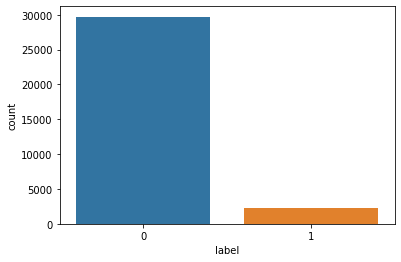

In [4]:
sns.countplot(twitter.label)

# doing normalization of text
#1.convert to lower case why?what will happen if we do all letters to upper case
#2.stemming
#3.lemmmitization
#4.morphology
#5.part of speech

In [14]:
twitter.tweet=twitter.tweet.str.lower()

In [15]:
twitter.tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

# now try to remove stopwords and punctuation from document and get distict word


In [22]:
import nltk
from nltk.corpus import stopwords
import string

In [23]:
def text_process(mess):
        """
        1.remove the punctuation
        2.remove the stopwords
        3.returnthe list of clean textwords
        """
        nopunc=[char for char in mess if char not in string.punctuation]
        nopunc="".join(nopunc)
        return[ word for word in nopunc.split() if word not in stopwords.words("english")]

In [24]:
twitter["tweet"].apply(text_process)

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

# build wordclod

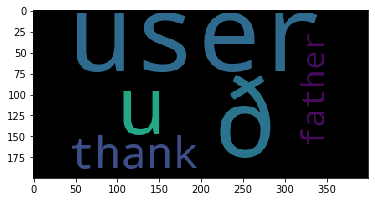

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud=WordCloud(max_words=5).generate(str(twitter["tweet"]))
plt.imshow(cloud)


There are 2740409 words in the combination of all review.


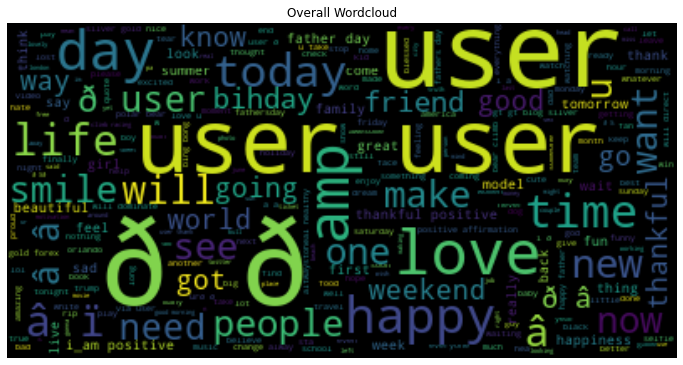

In [8]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.
text = " ".join(review for review in twitter.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
#text_newALL = prepCloud(text,Topic)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Overall Wordcloud")
plt.axis("off")
plt.show()

# process for building TDM

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(analyzer=text_process).fit(twitter["tweet"])#run on each row of column (message)
messages_bow=count.transform(twitter.tweet)# fir TDM

# sampling

In [33]:
#sampling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(messages_bow,twitter.label,test_size=.2)

# naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
pred_test_y=NB.predict(x_test)
pred_test_y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_test_y,y_test)

array([[5781,  207],
       [ 140,  265]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test_y)

0.9457218833098702

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
pred_y=rf.predict(x_test)
pred_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)
#tpr=0.4,fpr=0.00 precision:0.9

array([[5904,  256],
       [  17,  216]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.9572970436414828

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
pred_y=dt.predict(x_test)
pred_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)    

array([[5805,  218],
       [ 116,  254]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.9477553574221805

# logistic Regression


In [48]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_y=logmodel.predict(x_test)
pred_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)

array([[5887,  219],
       [  34,  253]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_y,y_test)

0.9604254653527295